**Dataset "Customer Churn Rate"**
URL: https://www.kaggle.com/datasets/divu2001/customer-churn-rate?https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fdivu2001%2Fcustomer-churn-rate%3Fresource=downloadresource%3Ddownload


**Часть 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')

In [ ]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
#Сколько в датасете строк и столбцов?

data.shape

(10000, 14)

В датасете 10000 строк и 14 столбцов

In [ ]:
#Опишите признаки в датасете. Какие признаки количественные, категориальные, номинальные?

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


В датасете представлены количественные дискретные переменные: CreditScore, Age, Tenure и NumOfProducts, так же есть количественные непрерывные: Balance и EstimatedSalary. Из категориальных переменных в датасете есть бинарные: Gender, HasCrCard, IsActiveMember и Exited, и три номинальных: CustomerId, Surname и Geography. Также переменная RowNumber (категориальная номинальная) просто отражает индекс элемента, так что данный столбец стоит убрать (так как индекс автоматически отображается в датафрейме pandas).

In [ ]:
#Есть ли пропуски в данных?

data.isna().values.any()

False

В датасете нет пропусков.

In [ ]:
#Есть ли в данных полные дубликаты?

data.duplicated().any()

False

Дубликаты тоже не наблюдаются.

In [ ]:
#Теперь разберёмся с переменными в нашем датасете

data = data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

Убираем данные переменные, поскольку CustomerId и Surname - категориальные переменные, которые не будут влиять ни на что в дальнейшем, а RowNumber просто отображает индекс элемента.

In [ ]:
#Используем One Hot Encoding, чтобы закодировать категориальные переменные Gender и Geography в бинарные.

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
ohed = ohe.fit_transform(data[['Gender', 'Geography']])

data = pd.concat([data, ohed], axis=1).drop(columns=['Gender', 'Geography'])

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,1.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,1.0,0.0,0.0,0.0,1.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,1.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,1.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.0,0.0,0.0,0.0,1.0


In [ ]:
#Есть ли в данных выбросы?

for col in data.columns:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1

  outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
  print(col) if outliers[col].any() == True else False

CreditScore
Age
NumOfProducts
Exited
Geography_Spain


Здесь мы вывели столбцы, в которых нашлись выбросы. Мы пользовались критерием с использованием квантилей, а именно нашли разницу между 1 и 3 квантилями, умножили её на 1.5, вычли найденное число из первого квантиля для нижнего порога и прибавили к третьему квантилю для верхнего.
Из получившихся столбцов Exited и Geography_Spain - бинарные переменные, так что там выбросами засчитались все значения = 1 (поэтому мы это игнорируем). Далее уберём элементы, в которых есть выбросы. Для этого мы развернем критерии и будем переназначать датасет оставляя только те элементы, которые подходят по критерию.

In [ ]:
#Удаляем выбросы

no_outliers = data
for col in ['CreditScore', 'Age', 'NumOfProducts']:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1

  no_outliers = no_outliers[(no_outliers[col] > Q1 - 1.5 * IQR) & (no_outliers[col] < Q3 + 1.5 * IQR)]

data = no_outliers

In [ ]:
#Посчитаем описательные статистики по переменным

data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
count,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000
mean,650.721282,37.602102,5.013663,76422.825979,1.515922,0.705833,0.502680,100117.878537,0.196427,0.452759,0.547241,0.501734,0.250552,0.247714
std,96.024271,8.621119,2.887532,62439.804075,0.549460,0.455691,0.500019,57513.403721,0.397316,0.497789,0.497789,0.500023,0.433354,0.431708
min,386.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51112.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97042.600000,1.000000,1.000000,1.000000,100130.950000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,717.000000,43.000000,7.000000,127624.090000,2.000000,1.000000,1.000000,149464.930000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,850.000000,61.000000,10.000000,250898.090000,3.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Выведем матрицу корреляции

data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.013864,-0.000634,0.007042,0.009547,-0.002030,0.020944,0.002351,-0.016384,0.003401,-0.003401,-0.013026,0.008044,0.007013
Age,-0.013864,1.000000,-0.012508,0.040749,-0.060902,-0.012995,0.012878,-0.004819,0.354963,0.029884,-0.029884,-0.051385,0.062840,-0.003563
Tenure,-0.000634,-0.012508,1.000000,-0.014962,0.014636,0.020788,-0.028781,0.009366,-0.014341,-0.015638,0.015638,-0.003365,-0.000888,0.004789
Balance,0.007042,0.040749,-0.014962,1.000000,-0.332589,-0.012308,-0.006476,0.011047,0.113866,-0.013576,0.013576,-0.229067,0.401136,-0.137350
NumOfProducts,0.009547,-0.060902,0.014636,-0.332589,1.000000,0.003806,0.013139,0.010610,-0.108936,0.013991,-0.013991,-0.000005,-0.020287,0.020370
HasCrCard,-0.002030,-0.012995,0.020788,-0.012308,0.003806,1.000000,-0.011532,-0.011193,-0.006503,-0.005898,0.005898,0.006621,0.010802,-0.018512
IsActiveMember,0.020944,0.012878,-0.028781,-0.006476,0.013139,-0.011532,1.000000,-0.008751,-0.143119,-0.021344,0.021344,-0.000334,-0.015226,0.015671
EstimatedSalary,0.002351,-0.004819,0.009366,0.011047,0.010610,-0.011193,-0.008751,1.000000,0.009593,0.007489,-0.007489,-0.002208,0.012125,-0.009614
Exited,-0.016384,0.354963,-0.014341,0.113866,-0.108936,-0.006503,-0.143119,0.009593,1.000000,0.103521,-0.103521,-0.104089,0.171368,-0.051461
Gender_Female,0.003401,0.029884,-0.015638,-0.013576,0.013991,-0.005898,-0.021344,0.007489,0.103521,1.000000,-1.000000,-0.009911,0.026615,-0.015237


In [ ]:
data.corr()['Exited']

CreditScore         -0.016384
Age                  0.354963
Tenure              -0.014341
Balance              0.113866
NumOfProducts       -0.108936
HasCrCard           -0.006503
IsActiveMember      -0.143119
EstimatedSalary      0.009593
Exited               1.000000
Gender_Female        0.103521
Gender_Male         -0.103521
Geography_France    -0.104089
Geography_Germany    0.171368
Geography_Spain     -0.051461
Name: Exited, dtype: float64

Мы вывели корреляцию с таргет переменной отдельно, чтобы нагляднее увидеть, с какими переменными у неё наибольшая корреляция. Здесь можно увидеть, что данными переменными являются Age, Balance, Geography_Germany и IsActiveMember.

Text(0.5, 1.0, 'Correlation heatmap for train')

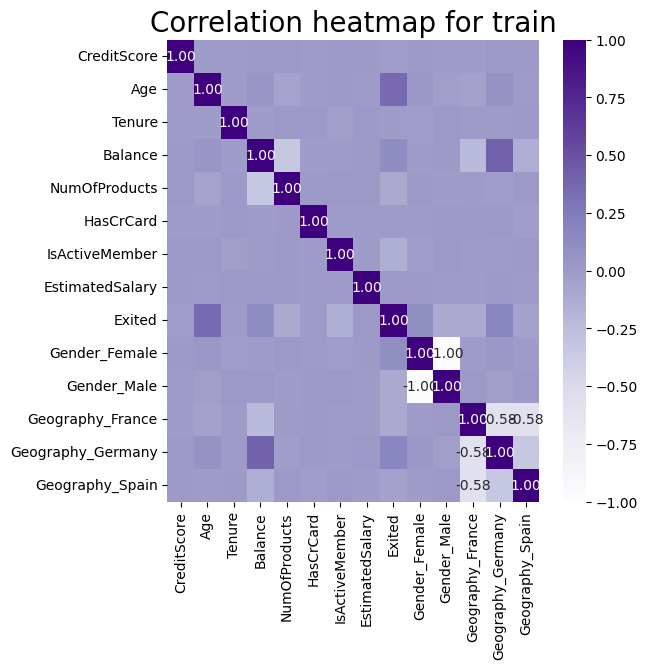

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(data.corr(), cmap="Purples", annot=True, fmt="0.2f")
for t in ax.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")

ax.set_title('Correlation heatmap for train', fontsize=20)

Здесь мы вывели ту же корреляцию в более наглядном виде. Здесь нам бросилось в глаза то, что самая большая корреляция в матрице получилась у Balance и Geography_Germany, что заставило нас предположить, что средний баланс у клиентов из Германии больше, чем у клиентов из других стран. Проверим эту гипотезу:

In [ ]:
print('Average balance in France - ', data[data['Geography_France'] == 1]['Balance'].mean())
print('Average balance in Germany - ', data[data['Geography_Germany'] == 1]['Balance'].mean())
print('Average balance in Spain - ', data[data['Geography_Spain'] == 1]['Balance'].mean())

Average balance in France -  62170.1764935065
Average balance in Germany -  119739.28504194629
Average balance in Spain -  61478.28216801018


Здесь мы проверили гипотезу о том, что средний баланс у клиентов из Германии больше, чем у клиентов из остальных стран. И правда, оказалось, что у них средний баланс в два раза больше.

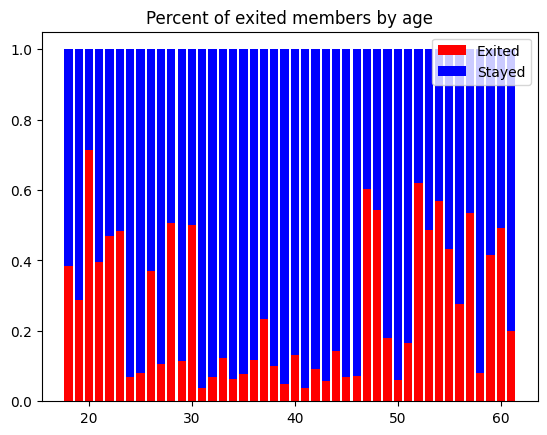

In [ ]:
#График_1: "Оси: возраст клиентов - проценты ушедших и оставшихся в банке клиентов"

x = data['Age'].unique()
y1 = data[data['Exited'] == 1]['Age'].value_counts() / data['Age'].value_counts()
y2 = data[data['Exited'] == 0]['Age'].value_counts() / data['Age'].value_counts()

plt.bar(x, y1, color='r', label='Exited')
plt.bar(x, y2, bottom=y1, color='b', label='Stayed')
plt.legend()
plt.title('Percent of exited members by age')
plt.show()

Мы можем увидеть по данному графику влияние возраста клиентов банка на отказ от дальнейшего обсуживания данным банком. Видим зависимость: Наибольший процент оставшихся клиентов наблюдается в диапазоне от 31 до 46 лет, тогда как в возрастах около 20 и старше 47 лет процент ушедших клиентов близок к 50%.

<ipython-input-41-a02c5e791437>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="NumOfProducts", y="Age", data=data, kind="box", palette="Purples_d")


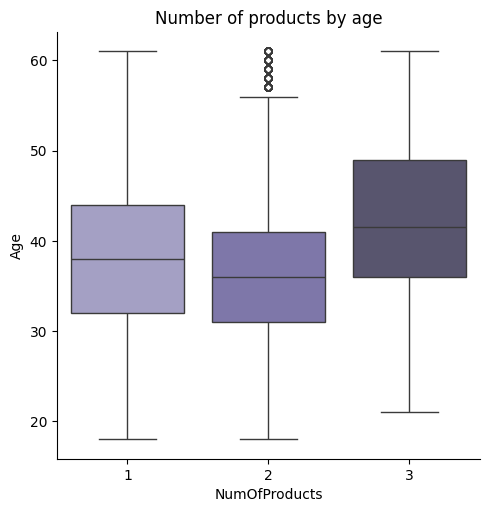

In [ ]:
#График_2: "Оси: возраст клиентов - количество продуктов"

sns.catplot(x="NumOfProducts", y="Age", data=data, kind="box", palette="Purples_d")
plt.title("Number of products by age")
plt.show()

Можно увидеть по данному графику зависимость количества продуктов от возраста клиента: 3 продукта чаще берут клиенты постарше (35-48 лет примерно), 2 продукта - клиенты помладше (32-40 лет примерно).

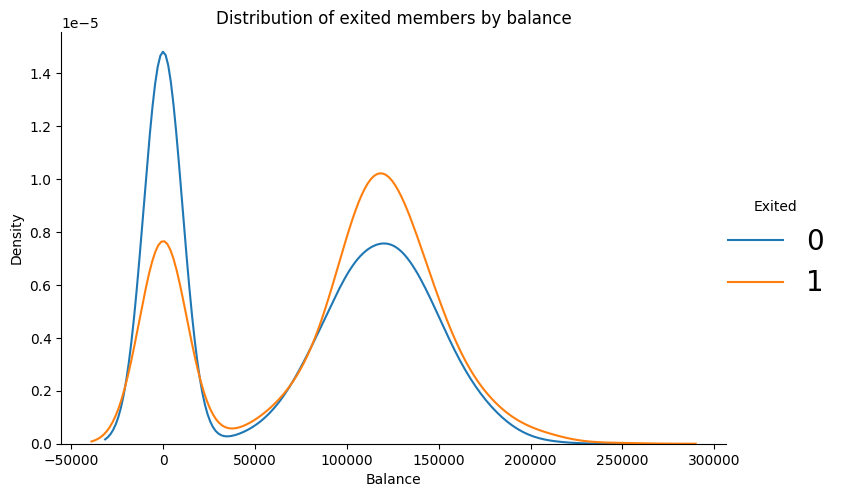

In [ ]:
#График_3: "Оси: плотность, отображающая количество действующих клиентов банка - баланс средств, лежащих на банковском счёте "

facet = sns.FacetGrid(data=data, hue="Exited", legend_out=True, height=5, aspect=1.5)
facet = facet.map(sns.kdeplot, "Balance")
plt.title('Distribution of exited members by balance')
facet.add_legend(fontsize=20);

С помощью данного графика мы можем увидеть зависимость плотности, отображающей количество действующих клиентов банка, от баланса средств, лежащих на банковском счёте клиентов.

Синия линия - это плотность оставшихся клиентов относительно баланса их счёта. Оранжевая линия - это плотность покинувших банк клиентов относительно баланса их счёта.

Что мы можем увидеть? При отрицательном балансе средств: ушедших клиентов больше, чем оставшихся. При нулевом балансе средств: оставшихся намного больше, чем ушедших. Но при балансе средств около 100000-150000 ситуация меняется, ушедших становится больше, чем оставшихся.

**Часть 2**

**Гипотезы**:

***1) Одновыборочная t:***

Основная гипотеза H0: Среднее значение выборки 5% баланса клиентов равно среднему значению по генеральной совокупности баланса клиентов.

Альтернативная гипотеза H1: Среднее значение выборки не равно среднему значению по генеральной совокупности баланса клиентов.

In [ ]:
from scipy import stats

mu_exp = np.mean(data.sample(frac=0.05, random_state=12)['Balance'])
balance = np.array(data['Balance'])

result = stats.ttest_1samp(a=balance,                # выборка
                           popmean=mu_exp,           # ожидаемое математическое ожидание
                           alternative='two-sided')  # тип гипотезы: 'less', 'greater' or 'two-sided'

print(result.pvalue > 0.1)    #уровень значимости 10%
print(result.pvalue > 0.05)   #уровень значимости 5%
print(result.pvalue > 0.01)   #уровень значимости 1%

False
True
True


Основная гипотеза принимается на уровнях значимости 1% и 5%.

Вывод: Можно ли оценивать общий баланс клиентов по небольшой выборке? Да, с достаточно хорошей точностью.

In [ ]:
print('Среднее значение по выборке:', mu_exp)
print('Среднее значение по генеральной совокупности:', np.mean(balance))

Среднее значение по выборке: 75230.62386554622
Среднее значение по генеральной совокупности: 76422.82597898056


Мы вывели среднее значение по выборке и среднее по всем данным баланса клиентов и убедились, что они немного отличаются, в связи с чем гипотеза была принята, но не на всех уровнях значимости.

***2) Двухвыборочная t:***

Основная гипотеза H0: Средний возраст клиентов, покинувших банк, равен среднему возрасту людей, которые остались.

Альтернативная гипотеза H1: Средний возраст клиентов, покинувших банк, не равен среднему возрасту людей, которые остались.

In [ ]:
a = np.array(data[(data['Exited'] == 0)]['Age'])
b = np.array(data[(data['Exited'] == 1)]['Age'])

result = stats.ttest_ind(a=a,  #выборка 2
                         b=b, #выборка 1
                         equal_var=False)

print(result.pvalue > 0.1)    #уровень значимости 10%
print(result.pvalue > 0.05)   #уровень значимости 5%
print(result.pvalue > 0.01)   #уровень значимости 1%

#отвергнута: средний возраст отличается

False
False
False


Основная гипотеза отвергается.

In [ ]:
print('Средний возраст клиентов, покинувших банк:', np.mean(a))
print('Средний возраст клиентов, которые остались клиентами банка:', np.mean(b))

Средний возраст клиентов, покинувших банк: 36.08919696573372
Средний возраст клиентов, которые остались клиентами банка: 43.791332263242374


Мы вывели средний возраст клиентов, покинувших банк и средний возраст клиентов, которые остались и убедились, что возраста клиентов отличаются, следовательно гипотеза отвергнута.

Значит, средний возраст клиентов, которые остались, выше, чем средний возраст клиентов, которые покинули банк. Получается на основе этого делаем вывод, что банку, с которым мы работаем, стоит ориентироваться на более старшую возрастную группу, чтобы повысить сохраняемость клиентов.

**3) Хи-квадрат:**

Основная гипотеза H0: Активность клиента не влияет на то, остался он в банке или покинул его.

Альтернативная гипотеза H1: Активность клиента влияет на то, остался он в банке или покинул его.

In [ ]:
ie = pd.DataFrame()
ie.index = ['Is active member', 'Is not active member']
ie['Exited'] = [data[(data['IsActiveMember'] == 1) & (data['Exited'] == 1)].shape[0], data[(data['IsActiveMember'] == 0) & (data['Exited'] == 1)].shape[0]]
ie['Stayed'] = [data[(data['IsActiveMember'] == 1) & (data['Exited'] == 0)].shape[0], data[(data['IsActiveMember'] == 0) & (data['Exited'] == 0)].shape[0]]
ie

,Exited,Stayed
Is active member,669,4114
Is not active member,1200,3532


In [ ]:
result = stats.chi2_contingency(ie.values, correction = False)

print(result.pvalue > 0.1)    #уровень значимости 10%
print(result.pvalue > 0.05)   #уровень значимости 5%
print(result.pvalue > 0.01)  #уровень значимости 1%

#гипотеза отвергнута -> активность влияет

False
False
False


Основная гипотеза отвергнута, активность клиента влияет.

In [ ]:
print('Корреляция активности клиентов и того, покинули ли они банк:', data['IsActiveMember'].corr(data['Exited']))

Корреляция активности клиентов и того, покинули ли они банк: -0.1431185620451489


Корреляция есть, значит активность клиента влияет.

Благодаря этому банк может провести статистический анализ, ориентируясь на активность клиента. Чем активнее клиент, тем выше шанс, что он продолжит работать с данным банком. Значит банк должен отслеживать данную область, предлагать какие-то бонусы за активное участие клиентов, чтобы поддерживать стабильную активность.

**Часть 3**

Основное задание:

Мы взяли в качестве модели логистическую регрессию:

Разделим на обучающую и тестовую выборки, пронормируем данные и выведем точность на тренировочной и обучающей выборках:

(Мы взяли 4 признака: возраст, баланс, активность, количество продуктов, так как у них наибольшая по модулю корреляция с целевой переменной)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[['Age', 'Balance', 'IsActiveMember', 'NumOfProducts']]
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.seed(42))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

print('Accuracy on Train:', accuracy_score(y_train, y_train_pred))
print('Accuracy on Test:', accuracy_score(y_test, y_pred))

Accuracy on Train: 0.8265765765765766
Accuracy on Test: 0.8238178633975481


Вывод: на тестовой выборке у нас получилась точность модели 82,38%, и на тренировочной почти такая же: 82,65%, так что можем сделать вывод, что логистическая регрессия работает хорошо вне зависимости от того, обучалась она на проверяемых данных или нет. Значит, основываясь на рассматриваемых признаках, можно сделать предсказание "уйдёт ли человек из банка" с хорошей точностью.

In [ ]:
y_simple_pred = np.array([0 for i in range(len(y_test))])
y_train_simple_pred = np.array([0 for i in range(len(y_train))])

print('Accuracy on Train:', accuracy_score(y_train, y_train_simple_pred))
print('Accuracy on Test:', accuracy_score(y_test, y_simple_pred))

Accuracy on Train: 0.8066066066066067
Accuracy on Test: 0.7964973730297723


Мы также сделали модель, которая предсказывает для каждого варианта ответ 0, потому что это самый "популярный" класс. То есть говорим, что все клиенты не покинули банк, и смотрим насколько это точно. Точность у нас получилась довольно хорошая: 80% в среднем. Но точность на логистической регрессии вышла лучше, значит модель хорошая.

Дополнительное задание:

Когда мы только начинали делать это задание, мы делали всё на одной выборке, из-за чего получилась ситуация, что Бэггинг и Случайный лес сильно переобучились и выдавали точность в примерно 97% (это было ожидаемо, так как данные модели работают на решающих деревьях, которые сильно склонны к переобучению). Тогда мы решили разделить выборку на обучающую и тестовую (что мы и сделали выше в основном задании). Благодаря этому получили реалистичную точность на тестовой выборке примерно в 82% и 85% (см. ниже). На тренировочной выборке точность получилась высокая, особенно у Бэггинга, однако Случайный лес выдал довольно адекватную точность благодаря ограничивающим гиперпараметрам.

1) Бэггинг

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators=200)
bagging.fit(X_train, y_train)

y_train_pred = bagging.predict(X_train)
y_pred = bagging.predict(X_test)

print('Accuracy on Train:', accuracy_score(y_train, y_train_pred))
print('Accuracy on Test:', accuracy_score(y_test, y_pred))

Accuracy on Train: 0.972072072072072
Accuracy on Test: 0.8203152364273205


2) Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=9, min_samples_leaf=5) #гиперпараметры выбирали наугад, пока не добились улучшения качества
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

print('Accuracy on Train:', accuracy_score(y_train, y_train_pred))
print('Accuracy on Test:', accuracy_score(y_test, y_pred))

Accuracy on Train: 0.8723723723723724
Accuracy on Test: 0.8462346760070053


Вывод:

У нас точность на Бэггинге и Случайном лесе получилось лучше, чем на логистической регрессии. Во многом за счёт того, что данные модели являются нелинейными, в отличии от логистической регрессии, и также они определяют нелинейные зависимости. В нашем датасете среди признаков была несильно высокая корреляция (мы взяли самые большие корреляции, но даже они меньше 0,36). И поэтому модели, которые учитывают нелинейные зависимости, сработали получше.

Чтобы улучшить точность, мы добавили гиперпараметры в Случайный лес, которые ограничивают глубину и количество листьев в решаюших деревьях Случайного леса. Поэтому он показал самый лучший результат - 85%.

В связи с особенностями нашего датасета, есть ряд внешних факторов, не включенных в него, которые могут влиять на целевую переменную ("ушёл человек из банка или нет"), поэтому точность 85% - это отличный результат.